<a href="https://colab.research.google.com/github/adarshshrivastavaraj/DL/blob/master/VGG16_human_VS_horse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import keras
from keras.application.

SyntaxError: ignored

In [0]:
import keras.backend as K 
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Reshape , Dense , Lambda ,Add ,Multiply , dot, Flatten 
from keras.layers import GlobalAveragePooling1D, Dropout, BatchNormalization,Conv2D,MaxPool2D
from keras.layers import Layer
from keras.models import Model
import numpy as np

Using TensorFlow backend.


In [0]:
inputs = Input(shape = (300 , 300 , 3))
out = Conv2D(filters=64 , strides = 1 , kernel_size = (3, 3) ,padding='same',  activation='relu')(inputs)
out = MaxPool2D(pool_size=(2,2) , strides= 2)(out)

In [0]:
# out.shape

In [0]:
out = Conv2D(filters=128 , strides = 1 , kernel_size = (3, 3) ,padding='same',  activation='relu')(out)
out = MaxPool2D(pool_size=(2,2) , strides= 2)(out)
# out.shape

In [0]:
out = Conv2D(filters=256 , strides = 1 , kernel_size = (3, 3) ,padding='same',  activation='relu')(out)
out = MaxPool2D(pool_size=(2,2) , strides= 2)(out)
# out.shape

In [0]:
out = Conv2D(filters=512 , strides = 1 , kernel_size = (3, 3) ,padding='same',  activation='relu')(out)
out = MaxPool2D(pool_size=(2,2) , strides= 2)(out)
# out.shape

In [0]:
out = Conv2D(filters=512 , strides = 1 , kernel_size = (3, 3) ,padding='same',  activation='relu')(out)
out = MaxPool2D(pool_size=(2,2) , strides= 2)(out)
out = Flatten()(out)

In [0]:
out=Dense(units = 100 , activation='relu')(out)
out=Dense(units = 100 , activation='relu')(out)
out=Dense(units = 2 , activation = 'softmax')(out)

model = Model(inputs = inputs , outputs = out)




In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 150, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 256)       0   

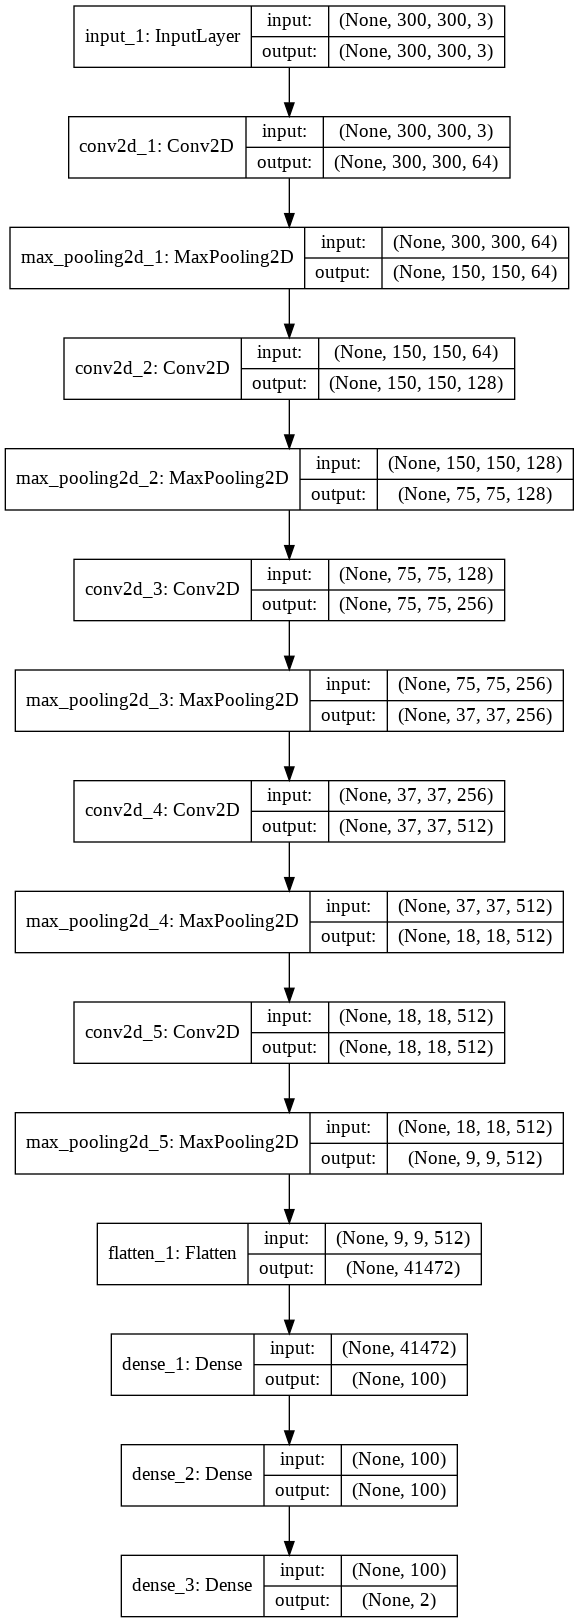

In [0]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip "/content/drive/My Drive/horses-or-humans-dataset.zip"

Archive:  /content/drive/My Drive/horses-or-humans-dataset.zip
  inflating: horse-or-human/horse-or-human/train/horses/horse01-0.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-1.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-2.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-3.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-4.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-5.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-6.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-7.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-8.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-9.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse02-0.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse02-1.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse02-2.png  
 

In [0]:
from keras import optimizers

In [0]:
model.compile(loss= "categorical_crossentropy", optimizer=optimizers.Adam(),
              metrics = ["accuracy"])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, 
    vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory("/content/horse-or-human/train",
                                                    target_size = (300, 300),
                                                    batch_size= 32,
                                                    shuffle= True)
val_generator = train_datagen.flow_from_directory("/content/horse-or-human/validation",
                                                    target_size = (300, 300),
                                                    batch_size= 32,
                                                    shuffle= True)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [0]:
model.fit_generator(train_generator, steps_per_epoch=1302 // 32, 
                    epochs= 50, validation_data= val_generator,
                    validation_steps= 558//32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





40/40 [==============================] - 42s 1s/step - loss: 0.6749 - acc: 0.6323 - val_loss: 0.6163 - val_acc: 0.6985
Epoch 2/50
40/40 [==============================] - 27s 685ms/step - loss: 0.4834 - acc: 0.8080 - val_loss: 0.5035 - val_acc: 0.8180
Epoch 3/50
40/40 [==============================] - 29s 735ms/step - loss: 0.2344 - acc: 0.9070 - val_loss: 1.5009 - val_acc: 0.8180
Epoch 4/50
40/40 [==============================] - 28s 706ms/step - loss: 0.1888 - acc: 0.9246 - val_loss: 1.3351 - val_acc: 0.7794
Epoch 5/50
40/40 [==============================] - 34s 859ms/step - loss: 0.2032 - acc: 0.9168 - val_loss: 1.7934 - val_acc: 0.8088
Epoch 6/50
40/40 [==============================] - 28s 711ms/step - loss: 0.1557 - acc: 0.9422 - val_loss: 1.0916 - val_acc: 0.7555
Epoch 7/50
40/40 [==============================] - 29s 725ms/step - loss: 0.1127 - acc: 0.9632 - val_l